## England Premier League: *"Predicting Success in the Premier League"*
This lab was adapted by Niccolò Pescetelli from OpenIntro and Moneyball Labs, using Premier League data from [football-data.co.uk](https://www.football-data.co.uk).



### **1. The Data**

Load a sample CSV (e.g. `E0.csv` for Premier League 2025–26) from `football-data.co.uk`.



In [1]:
!pip install statsmodels



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

url = "https://www.football-data.co.uk/mmz4281/2526/E0.csv" # alternatively use a local file path
df = pd.read_csv(url)
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,E0,15/08/2025,20:00,Liverpool,Bournemouth,4,2,H,1,0,...,2.03,1.78,2.07,1.85,2.03,1.88,1.94,1.76,2.14,1.86
1,E0,16/08/2025,12:30,Aston Villa,Newcastle,0,0,D,0,0,...,2.05,1.80,2.02,1.89,2.06,1.80,1.95,1.74,2.14,1.86
2,E0,16/08/2025,15:00,Brighton,Fulham,1,1,D,0,0,...,1.83,2.03,1.93,2.00,1.84,2.03,1.80,1.96,1.91,2.08
3,E0,16/08/2025,15:00,Sunderland,West Ham,3,0,H,0,0,...,1.95,1.90,1.97,1.95,1.95,1.94,1.86,1.78,2.02,1.97
4,E0,16/08/2025,15:00,Tottenham,Burnley,3,0,H,1,0,...,1.98,1.88,1.99,1.93,1.98,1.91,1.88,1.83,2.07,1.92


Explain variables:

* `FTHG`: Full-Time Home Goals
* `FTAG`: Full-Time Away Goals
* `HS`: Home Shots
* `AS`: Away Shots
* `HST`: Home Shots on Target
* `HC`: Home Corners
* `HY`: Home Yellow Cards
* `HR`: Home Red Cards



---

### **2. Exploratory Analysis**


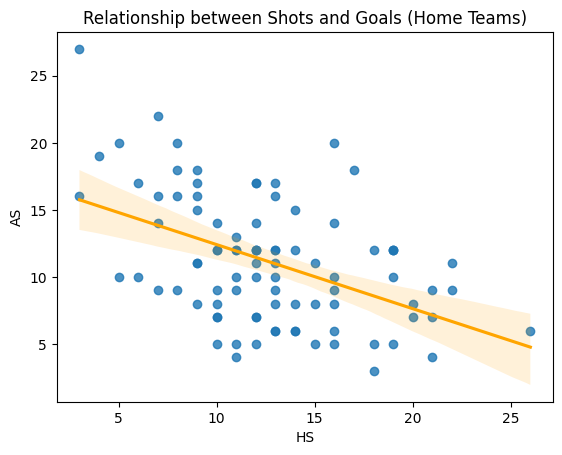

In [3]:
sns.regplot(data=df, x='HS', y='AS', line_kws={'color':'orange'})
plt.title("Relationship between Shots and Goals (Home Teams)")
plt.show()

Then compute correlation:



In [4]:
from scipy.stats import pearsonr
pearsonr( df['HS'], df['AS'] )

PearsonRResult(statistic=np.float64(-0.4721645875025149), pvalue=np.float64(2.6237440192096352e-06))


#### ✏️ Exercise 1
> - Discuss direction, strength, and form.
> 
> - Plot the relationship between *Home Shots (HS)* and *Full-Time Home Goals (FTHG)*.
> - Does the relationship look linear?


---

### **3. Variance and Residuals**



We will look at three types of variability:

* **Total Sum of Squares ($SS_T$)** = total variability in goals
* **Regression Model Sum of Squares ($SS_M$)** = Improvement in explained variability due to the model
* **Error Sum of Squares ($SS_R$)** = unexplained variability after fitting the model



Let's start by building a basic linear regression model predicting away shots (`AS`) from home shots (`HS`):

In [5]:
from statsmodels.formula.api import ols

formula = 'AS ~ HS'
model = ols(formula, data=df).fit()
pred = model.predict()
resid = df['AS'] - pred

Let's plot the relationship between *Home Shots (HS)* and *Away Shots (AS)*.

<Axes: xlabel='HS', ylabel='AS'>

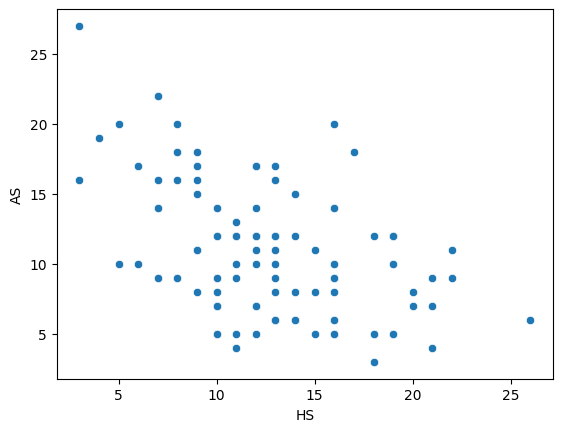

In [6]:
sns.scatterplot(data=df, x='HS', y='AS')

Let's build a simple model to predict `Away Shots`. Remember from last week, what is the simplest model we can use to predict the data? 

....wait for it....

**The constant model.**

The constant model predicts the same value for all observations, specifically the mean of the response variable. Let's visualize the residuals of the constant model.

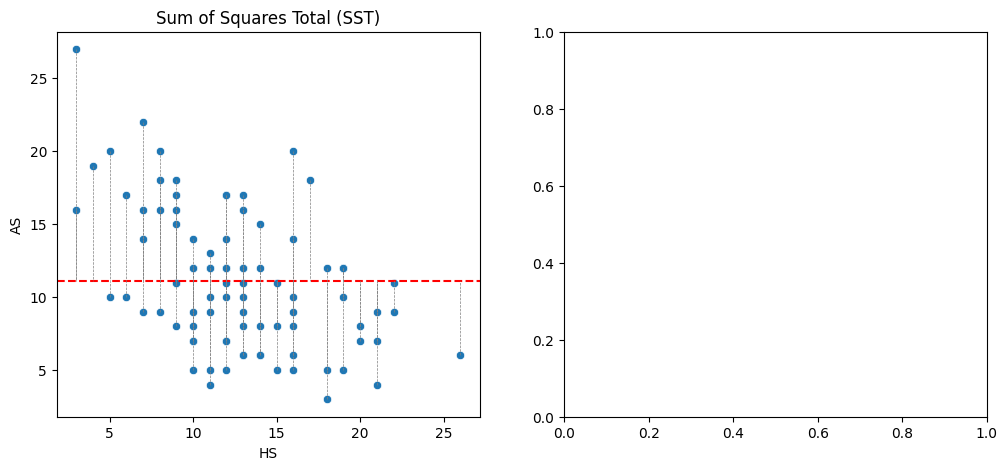

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# Plot SST
sns.scatterplot(data=df, x='HS', y='AS', ax=ax[0])
ax[0].set_title('Sum of Squares Total (SST)')
ax[0].axhline(y=np.mean(df['AS']), color='r', linestyle='--', label='Mean AS')
for i in range(len(df)):
    ax[0].plot([df['HS'][i], df['HS'][i]], [df['AS'][i], np.mean(df['AS'])], color='gray', linestyle='--', linewidth=0.5)

Now, let's visualize the residuals of our linear regression model.

C:\Users\Ella\AppData\Local\Temp\ipykernel_23268\3415273964.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].axline((0, model.params[0]), slope=model.params[1], color='orange', label='Regression Line')


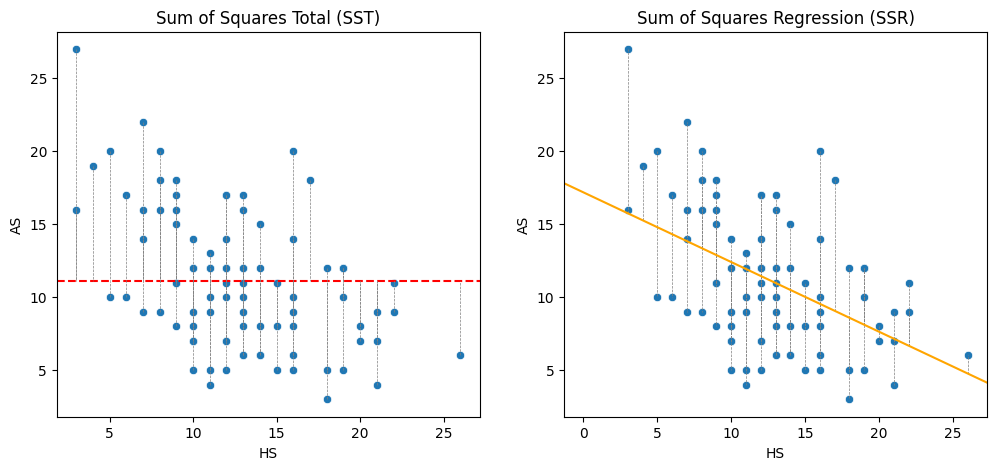

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# Plot SST
sns.scatterplot(data=df, x='HS', y='AS', ax=ax[0])
ax[0].set_title('Sum of Squares Total (SST)')
ax[0].axhline(y=np.mean(df['AS']), color='r', linestyle='--', label='Mean AS')
for i in range(len(df)):
    ax[0].plot([df['HS'][i], df['HS'][i]], [df['AS'][i], np.mean(df['AS'])], color='gray', linestyle='--', linewidth=0.5)

# Plot SSR
sns.scatterplot(data=df, x='HS', y='AS', ax=ax[1])
ax[1].set_title('Sum of Squares Regression (SSR)')
for i in range(len(df)):
    ax[1].plot([df['HS'][i], df['HS'][i]], [pred[i], df['AS'][i]], color='gray', linestyle='--', linewidth=0.5)

ax[1].axline((0, model.params[0]), slope=model.params[1], color='orange', label='Regression Line')

#### ✏️ Exercise 2
> - What do you notice about the residuals of the constant model vs. the linear regression model?
> - Which model seems to fit the data better? Why?
> - How would you quantify the improvement in fit from the constant model to the linear regression model?
> - A manager wants to predict the number of away shots based on home shots. If the manager could see only the model (the line) but not the data points, what would they predict for a game where the home team had 10 shots? What about 20 shots? 

#### **Goodness of Fit: R^2 vs F**
##### **R-squared (R²)**

$ R^2 $ quantifies the proportion of variance explained by the regression model.

$$ R^2 = \frac{SS_M}{SS_T} = 1 - \frac{SS_R}{SS_T}$$

If you are a visual learner, think of it this way:

|----------------$SS_T$-----------------|

|--------$SS_M$-----------|----$SS_R$----|

##### **Mean squared error**
Sums of squares are total values, but they can be also expressed as averages. These are called mean squares, MS. $F$ measures of how much the model has improved the prediction of the outcome compared to the level of inaccuracy of the model.

$$ F = \frac{MS_M}{MS_R} = \frac{SS_M / df_M}{SS_R / df_R} $$



---

### **4. The Residuals plot**

Recall that the difference between the observed values and the values predicted by the line are called *residuals*. Note that there is a residual for each observation, because the model will make an error for each observation in the dataset, that is the degree to which the model overestimates or underestimates the observed value.

${e}_i = y_i − \hat{y}_i$

To visualize the residuals of a linear regression, we can use `residplot()` function from `seaborn`:

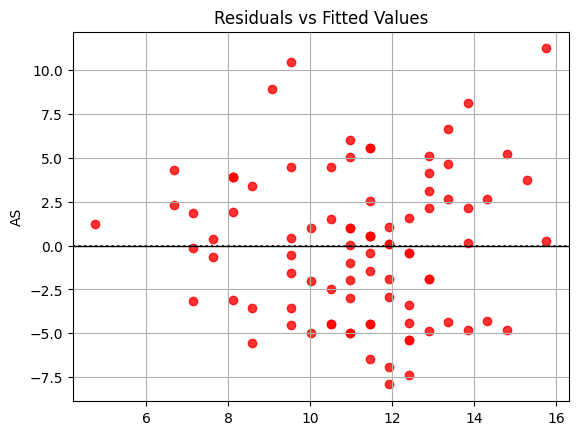

In [9]:
sns.residplot(x=pred, y=resid, color='red')
plt.axhline(0, color='black', lw=1)
plt.grid(True)
plt.title("Residuals vs Fitted Values")
plt.show()


In [10]:
forumula = "AS ~ HC"
model_hc = ols(formula=formula, data=df).fit()
print(model_hc.summary())


                            OLS Regression Results                            
Dep. Variable:                     AS   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     25.25
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           2.62e-06
Time:                        12:17:30   Log-Likelihood:                -255.51
No. Observations:                  90   AIC:                             515.0
Df Residuals:                      88   BIC:                             520.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1853      1.283     13.398      0.0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.show()



#### ✏️ Exercise 3
> - Fit a new regression model predicting `AS` using another numerical predictor in the dataset.
> - Write the regression equation and interpret the slope.
> - Visualise the residuals plot of your model.

---

### **5. The Linear Model**



Linear regression works by finding the line that minimises the sum of squared residuals (SSR):

$ SSR = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

This is why we call it the least squares line.

Let’s fit a simple linear regression predicting AS from HS.



In [33]:
model = sm.OLS(df['AS'], sm.add_constant(df['HS'])).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     AS   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     90.01
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           2.72e-19
Time:                        07:12:36   Log-Likelihood:                -1143.7
No. Observations:                 380   AIC:                             2291.
Df Residuals:                     378   BIC:                             2299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0796      0.671     26.946      0.0


> **Discuss:**
>
> * **Intercept**: expected goals with 0 shots.
> * **Slope**: expected change in goals per additional shot.
> * **R²**: goodness of fit. The proportion of variance in goals explained by shots.
> * **Adjusted R²**: penalized for additional predictors
> * **F-statistic**: overall model significance
> * **p-values**: significance of coefficients
> * **AIC/BIC**: Information criteria (the lower the better)

#### ✏️ Exercise 4
> - Compare models predicting goals from (a) shots, (b) shots on target, and (c) corners.
> - Which model fits best (highest R², lowest BIC)?
> - Write the regression equation for the model above (`AS ~ HS`) and predict the number of shots the away team will have if `HS=10`.



You should see two key numbers:

1. Intercept (the predicted away shots when home shots = 0)

2. Slope (the change in away shots for each additional home shot)

If the slope is negative, it tells us that as home teams shoot more, away teams shoot less — consistent with a defensive effect.

Example interpretation:

For every additional shot taken by the home team, the away team takes 0.4 fewer shots, on average.

The R² value tells us how much of the variability in away shots is explained by home shots.
For instance, an R² of 0.25 means that 25% of the variation in away shots can be predicted by knowing the number of home shots.

---

### **6. Checking Assumptions**


Now that we have our model, we must check whether it satisfies the assumptions of linear regression.

The relationship should be roughly linear.
Plot residuals against fitted values — if the points are randomly scattered, we’re good.

#### (1) Linearity

The relationship should be roughly linear.
Plot residuals against fitted values — if the points are randomly scattered, we’re good.

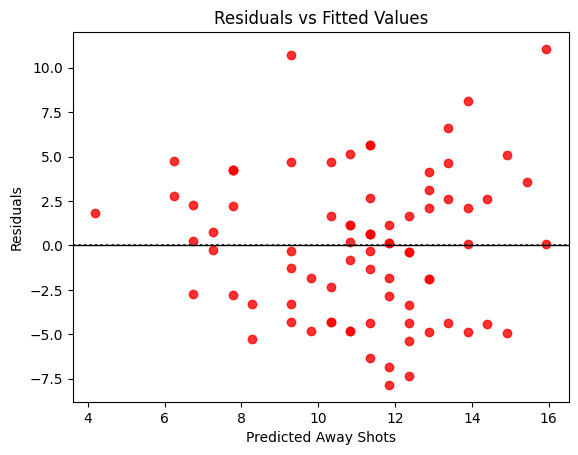

In [77]:
pred = model.predict()
resid = df['AS'] - pred

sns.residplot(x=pred, y=resid, color='red')
plt.axhline(0, color='black', lw=1)
plt.xlabel("Predicted Away Shots")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


> #### 🔍 Things to look for
> 1. With a single predictor: Scatter plot your x-variable against your y-variable. Is the relationship roughly linear?
> 2. With 2 or more predictors, you need to look at the residual plots. Do you see any clear pattern or curve? No pattern: Good. Pattern: Bad.
> 3. If residuals cluster above/below zero in certain regions, the relationship might not be perfectly linear.

#### ✏️ Exercise 5
> How would it look like if it wasn’t linear?
> - Try replace `HS` with `FTHG`.

In [78]:
# Your code here

#### (2) (near) Normality

Residuals should be approximately normally distributed.
This matters because many regression statistics (like t-tests) assume normality.

A **Q–Q plot** (short for Quantile–Quantile plot) is a graphical tool used to check whether your data follow a particular theoretical distribution — most commonly, the normal (bell-shaped) distribution.

In regression, we use it to check whether the residuals are approximately normal, which is one of the key assumptions of linear regression.

> ⚙️ How it works
> 
> Here’s what happens behind the scenes:
> 
> 1. Sort your residuals from smallest to largest.
> 
> 2. Compute their quantiles — e.g., the 10th percentile, 20th percentile, 30th, and so on.
> 
> 3. Generate the same quantiles from a theoretical normal distribution (the one you want to compare to).
> 
> 4. Plot one against the other.
> 
> So, each point on the plot represents:
> 
> (x = Theoretical quantile, y = Observed quantile)
> 
> If your data truly come from a normal distribution, those points will fall roughly on a straight diagonal line.

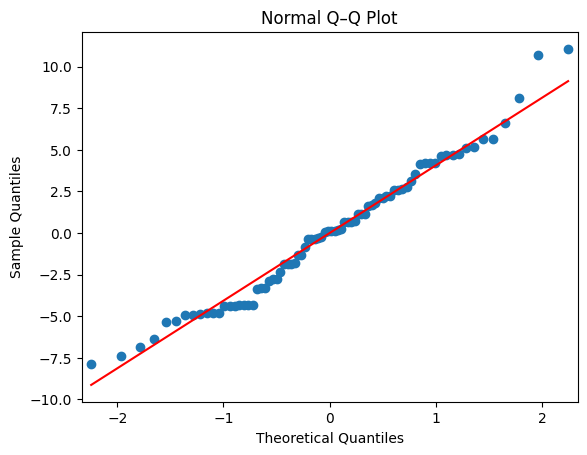

In [ ]:
sm.qqplot(resid, line='s')
plt.title("Normal Q–Q Plot")
plt.show()

| Pattern                                 | What it means                                                    |
| --------------------------------------- | ---------------------------------------------------------------- |
| Points follow the straight line closely | Residuals are approximately normal ✅                             |
| Points curve upward at the ends         | Residuals are **right-skewed** (too many large positive values)  |
| Points curve downward at the ends       | Residuals are **left-skewed** (too many large negative values)   |
| Points have an S-shaped curve           | Residuals have **heavy tails** — more extreme values than normal |


> ### Your turn
> - Interpret the Q–Q plot of the residuals from your model, using the table above.

#### (3) Homoscedasticity



In linear regression, homoskedasticity (or homoscedasticity) means that the variance of the residuals (errors) is constant across all levels of the predicted values.

In simpler terms: The model’s prediction errors should have roughly the same spread whether it’s predicting small, medium, or large values.


> ⚙️ Why it matters
> 
> Linear regression assumes that:
> 
> $ Var(e_i) = \sigma^2 $, for all datapoints $i$
> 
> That is, every residual (error term) has the same variance $\sigma^2$.
> 
> This assumption ensures that:
> 
> - The model’s standard errors are correct,
> 
> - Your confidence intervals and hypothesis tests are valid,
> 
> - No group of observations has disproportionate influence on the regression line.
> 
> When this assumption holds, the model is said to be homoskedastic (GOOD). If it doesn’t, it’s heteroskedastic (unequal spread -> BAD).

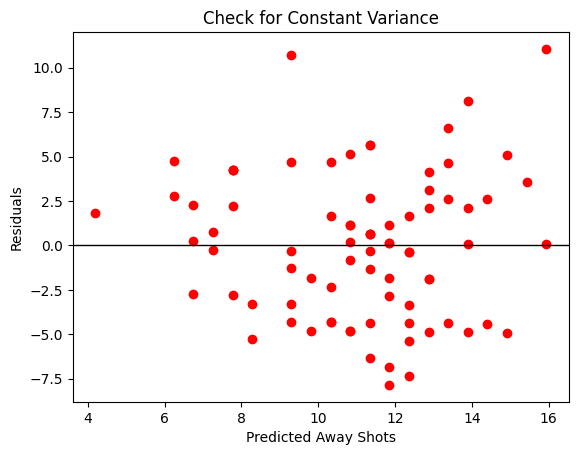

In [87]:
plt.scatter(pred, resid, color='red') 
# sns.residplot(x=pred, y=resid, color='red') # Alternative way with seaborn
plt.axhline(0, color='black', lw=1)
plt.xlabel("Predicted Away Shots")
plt.ylabel("Residuals")
plt.title("Check for Constant Variance")
plt.show()



| Pattern                                                             | Interpretation                                                |
| ------------------------------------------------------------------- | ------------------------------------------------------------- |
| Residuals randomly scattered around 0 with constant spread          | ✅ Homoskedastic — good!                                       |
| Residuals form a “fan” shape (narrow at one end, wide at the other) | ⚠️ Heteroskedastic — variance increases with predicted values |
| Residuals form an inverted fan (wide then narrow)                   | ⚠️ Heteroskedastic — variance decreases with predicted values |
| Residuals show a curve or systematic pattern                        | ⚠️ Possible nonlinearity or model misspecification            |


> **Exercise 3**
> - Are there any patterns in the residual plots? Do the assumptions appear to be satisfied?
> - Change the predictor to `FTHG` and check again. 
> - Using the table above, interpret the homo/hetero-scedasticity of your model.
> - **Bonus**: How would you check for the last assumption, i.e. "Independence"? How do you know if your observations are independent? 

---

### **7. On Your Own**

> **Independent Tasks:**
>
> 1. Fit a model using *shots on target (HST)* instead of *shots (HS)*. Compare R².
> 2. Add *corners (HC)* as a second predictor. Does the model improve?
> 3. Check assumptions for the best model.
> 4. Interpret the meaning of coefficients in football terms.
> 5. (Optional) Try predicting *total goals per match* using combined home/away data.


---

### **8. Reflection**



Summarize how:

* Variance decomposition ($SS_T = SS_R + SS_E$) relates to R²
* Residuals help identify model fit problems
* Statistical modeling can provide insight into real sports performance

